In [319]:
from math import *
import matplotlib.pyplot as plt
import numpy as np

## **Parameters**

In [320]:
k=1
n=2

**System parameters**

In [321]:
w1 = k*57.30 #f=9.12 s-1
w2 = n/k*1.15*w1
w3 = 2*w2
omega = np.diag([w1,w2,w3])
omega2 = omega**2

In [322]:
PHI=np.array([[0.125, 1.35, 5.13, 5.34],
             [-0.575, -3.86, 3.80, 4.67],
             [1.330, 3.21, 2.86, 4.41]])
PHI_nl=PHI[:,3]
PHI=PHI[:,:3]

Nonlinearity\
$k_1 = 0.0779 N.mm^{-1}$\
$k_3 = 2.516*10^{-3} N.mm^{-3}$

In [323]:
k_1 = 0.0779 #N/m
k_3 = 2.516e6/1000 #N/m3
# L = np.sqrt(k_1/k_3)
k_2 = 44271.480661934045 #k_3*L*100
f_nl = lambda x : k_1*x + k_2*x**2 + k_3*x**3
f_nl = np.vectorize(f_nl)
print(k_2)

44271.480661934045


Damping
$\delta=2*damping.ratio*\omega$

In [324]:
dampingcoeff= 0.005
delta = 2*dampingcoeff*omega

Initial conditions

$Q= \begin{pmatrix}
    Q_1 & Q_2 & Q_3 & \dot{Q_1} & \dot{Q_2} & \dot{Q_3}\\
\end{pmatrix} $

Excitation, Graphs & Simulation

In [325]:
Tsimul = 100
w0=w1/k-35
wend=w0+100
v=(wend-w0)/Tsimul
F=10
Pq = F*PHI[:,0]
excitation = lambda t:  Pq*cos((w0+v/2*t)*t)

# **Beam equations**


$\ddot{q}+\omega^{2}q+\Phi^{T}f_{nl}(\Phi_{tip}q) + \delta \dot{q} = excitation(t)$\    
$x=\Phi q$

In [326]:
def qres(t,Q):
  q=Q[:3]
  driv=Q[3:]
  fnl=np.matmul(PHI_nl,q)
  fnl=np.array([f_nl(fnl)]*3)
  #print(fnl)
  ddriv = -np.matmul(omega2,q) -np.matmul(PHI.T,fnl)+ excitation(t) - np.matmul(delta,driv)
  dQ=np.concatenate((driv,ddriv))
  return dQ

# **Graphiques**

In [327]:
from scipy.integrate import solve_ivp
sol = solve_ivp(qres, (0,Tsimul), [0,0,0,0,0,0], method='RK45')

In [328]:
sol.message

'The solver successfully reached the end of the integration interval.'

In [329]:
T2 = sol.t
Npoint = len(T2)
T = np.linspace(0, Tsimul, Npoint) # Vector of frequency ratios
Q = sol.y[:3]
Q1=Q[0]
Q2=Q[1]
Q3=Q[2]

In [330]:
PULS=np.linspace(w0,wend, Npoint)
fs=1/T[1]

In [331]:
from scipy.interpolate import interp1d
scaling = interp1d(T2, Q1, kind='linear')
Q1=scaling(T)
scaling = interp1d(T2, Q2, kind='linear')
Q2=scaling(T)
scaling = interp1d(T2, Q3, kind='linear')
Q3=scaling(T)
Q=np.concatenate((Q1,Q2,Q3)).reshape(3,len(T))


Text(0.5, 0.98, 'Q=f(w)')

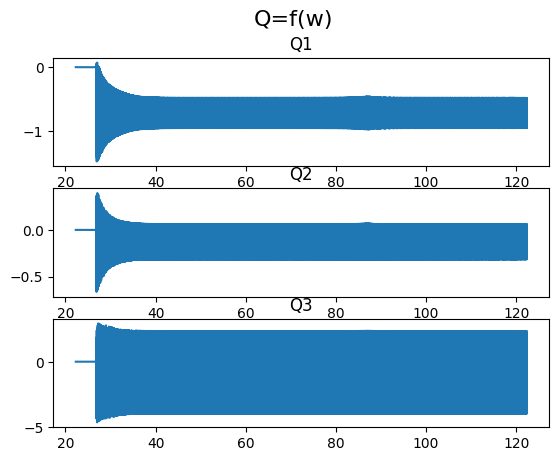

In [332]:
fig,ax=plt.subplots(3)
ax[0].plot(PULS,Q1)
ax[1].plot(PULS,Q2)
ax[2].plot(PULS,Q3)
ax[0].set_title('Q1')
ax[1].set_title('Q2')
ax[2].set_title('Q3')
fig.suptitle('Q=f(w)', fontsize=16)


# $X = \Phi Q$ 

In [333]:
X=np.matmul(PHI,Q)
X1=X[0]
X2=X[1]
X3=X[2]

Text(0.5, 0.98, 'X=f(freq)')

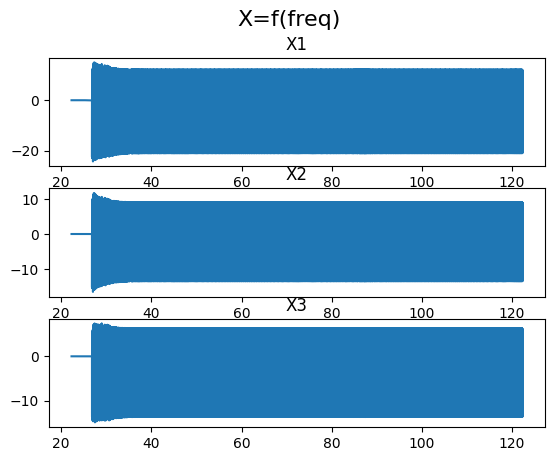

In [334]:
fig,ax=plt.subplots(3)
ax[0].plot(PULS,X1)
ax[1].plot(PULS,X2)
ax[2].plot(PULS,X3)
ax[0].set_title('X1')
ax[1].set_title('X2')
ax[2].set_title('X3')
fig.suptitle('X=f(freq)', fontsize=16)

(69.95, 70.0)

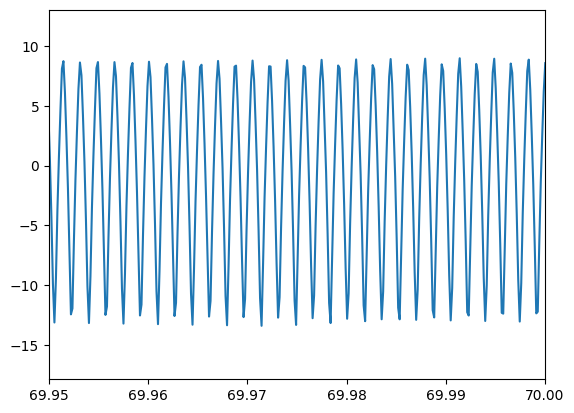

In [335]:
plt.plot(PULS,X2)
plt.xlim(69.95,70)

In [336]:
evenodd=''
if k_2==0:
    evenodd='odd'
if k_3==0:
    evenodd='even'


title1 = 'beam-' + str(k) + '_' + str(n) + '-1' + evenodd + '.csv'
title2 = 'beam-' + str(k) + '_' + str(n) + '-2' + evenodd + '.csv'
title3 = 'beam-' + str(k) + '_' + str(n) + '-3' + evenodd + '.csv'

X1.tofile(title1,sep=',')
X2.tofile(title2,sep=',')
X3.tofile(title3,sep=',')

print(title1)

beam-1_2-1.csv


In [337]:
print('fs', fs)
print('f0', w0/2/pi)
print('femd', wend/2/pi)

fs 6608.78
f0 3.5491552309492658
femd 19.4646495401388
